In [1]:
# Required Packages
import pandas as pd
import numpy as np
import pickle

# Plots

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

# sns setting
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})
sns.set_style("whitegrid")

# plt setting
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Airbnb_Logo_B%C3%A9lo.svg/1280px-Airbnb_Logo_B%C3%A9lo.svg.png' width='350' align="center"/>

# Airbnb Listings (Data Exploration)

#### Table of contents
* [Data Exploration](#Data-Exploration)
    * [Accommodation](#Accommodation)
    * [Reviews](#Reviews)
    * [Price and Zipcodes](#Price-and-Zipcodes)
    * [Price and Reviews](#Price-and-Reviews)

#### Loading the preprocessed Data

In [2]:
Data = pd.read_csv('Data/Clean_Airbnb_Listings.csv')
pkl_file = open('Data/Airbnb_Listings_Extra.pkl', 'rb')
Lists_df = pickle.load(pkl_file)
pkl_file.close()
del pkl_file
Data.head().style.hide_index()

id,number_of_reviews,availability_90,review_scores_rating,accommodates,bedrooms,zipcode,review_scores_location,bathrooms,availability_30,availability_365,review_scores_checkin,minimum_nights,price,maximum_nights,availability_60,review_scores_communication,review_scores_value,host_id,monthly_price,host_since,review_scores_cleanliness,weekly_price,beds,review_scores_accuracy,Apartment,Bed & Breakfast,Boat,Cabin,Camper/RV,Castle,Cave,Chalet,Dorm,Earth House,House,Hut,Lighthouse,Loft,Other,Tent,Treehouse,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
1069266,62,72,86.000000,2,1,10022,10.000000,1.000000,21,322,9.000000,3,160.000000,14,51,9.000000,9.000000,5867023,3054.316555,4/10/13,7.000000,1000.000000,1,9.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2061725,35,26,98.000000,2,1,11221,9.000000,1.000000,4,227,10.000000,3,58.000000,30,13,10.000000,10.000000,4601412,3054.316555,1/5/13,10.000000,953.795473,2,10.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
44974,26,1,96.000000,2,1,10011,10.000000,1.000000,1,274,10.000000,10,185.000000,30,1,10.000000,9.000000,198425,3400.000000,8/11/10,9.000000,953.795473,1,10.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4701675,1,90,100.000000,2,1,10011,10.000000,1.000000,30,365,10.000000,1,195.000000,1125,60,10.000000,10.000000,22590025,3054.316555,10/15/14,10.000000,953.795473,2,10.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
68914,16,57,96.000000,6,2,11231,10.000000,1.000000,11,287,10.000000,2,165.000000,365,33,9.000000,9.000000,343302,3054.316555,1/11/11,9.000000,953.795473,3,10.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


Extracting the lists

In [3]:
Properties_List = Lists_df['Properties_List'].tolist()
Rooms_List = Lists_df['Rooms_List'].tolist()
Beds_List = Lists_df['Beds_List'].tolist()
del Lists_df

## Data Exploration

### Accommodation

In [4]:
Beds = pd.DataFrame(Data.groupby(['beds'])['id'].count())
Beds.columns = ['Count']
display(Beds.T)

Accommodates = pd.DataFrame(Data.groupby(['accommodates'])['id'].count())
Accommodates.columns = ['Count']
display(Accommodates.T)

beds,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16
Count,16405,5589,1786,618,245,120,41,22,3,20,4,9,1,15,27


accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Count,2757,11696,2957,4382,994,1231,219,335,58,123,15,44,5,14,5,70


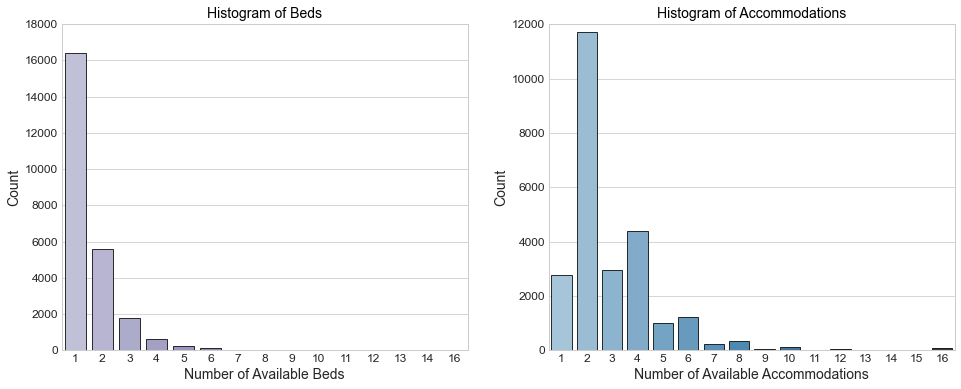

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=False)

# Left Plot
_ = sns.barplot(x='beds', y='Count', palette="Purples_d", edgecolor='k', data = Beds.reset_index(), ax = ax[0])
_ = ax[0].set_title('Histogram of Beds')
_ = ax[0].set_ylim([0, 18e3])
_ = ax[0].set_xlabel('Number of Available Beds')
_ = ax[0].set_ylabel('Count')

# Right Plot
_ = sns.barplot(x='accommodates', y='Count', palette="Blues_d", edgecolor='k', data = Accommodates.reset_index(), ax = ax[1])
_ = ax[1].set_title('Histogram of Accommodations')
_ = ax[1].set_ylim([0, 1.2e4])
_ = ax[1].set_xlabel('Number of Available Accommodations')
_ = ax[1].set_ylabel('Count')
# plt.subplots_adjust(wspace=0.2)
# _ = plt.tight_layout

It can be seen that the majority of listings have accommodations for 1-4 people. We also know that a bed accommodates two guests; therefore, we can also see that the majority of listed accommodations have a single bed.

In [6]:
def Correlation_Plot (Df,Fig_Size):
    Correlation_Matrix = Df.corr()
    mask = np.zeros_like(Correlation_Matrix)
    mask[np.triu_indices_from(mask)] = True
    for i in range(len(mask)):
        mask[i,i]=0
    Fig, ax = plt.subplots(figsize=(Fig_Size,Fig_Size))
    sns.heatmap(Correlation_Matrix, ax=ax, mask=mask, annot=True, square=True, 
                cmap =sns.color_palette("RdBu", n_colors=10), linewidths = 0.2, vmin=0, vmax=1, cbar_kws={"shrink": .5})
    bottom, top = ax.get_ylim()

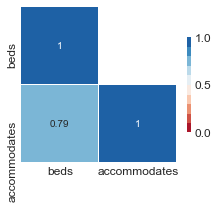

In [7]:
Correlation_Plot (Data[['beds','accommodates']], 3.5)

It also can be seen that these two parameters, **beds** and **accommodates** are highly correlated

In [8]:
Beds_Types_Count=pd.DataFrame(Data[Beds_List].sum(),columns=['Count'])
Beds_Types_Count.T

,Airbed,Couch,Futon,Pull-out Sofa,Real Bed
Count,193,98,446,290,23878


In [9]:
Rooms_Types_Count=pd.DataFrame(Data[Rooms_List].sum(),columns=['Count'])
Rooms_Types_Count.T

,Entire home/apt,Private room,Shared room
Count,13567,10516,822


In [10]:
Properties_Types_Count=pd.DataFrame(Data[Properties_List].sum(),columns=['Count'])
Properties_Types_Count.T

,Apartment,Bed & Breakfast,Boat,Cabin,Camper/RV,Castle,Cave,Chalet,Dorm,Earth House,House,Hut,Lighthouse,Loft,Other,Tent,Treehouse,Villa
Count,22513,170,11,3,1,1,1,1,48,1,1536,1,1,558,46,3,6,4


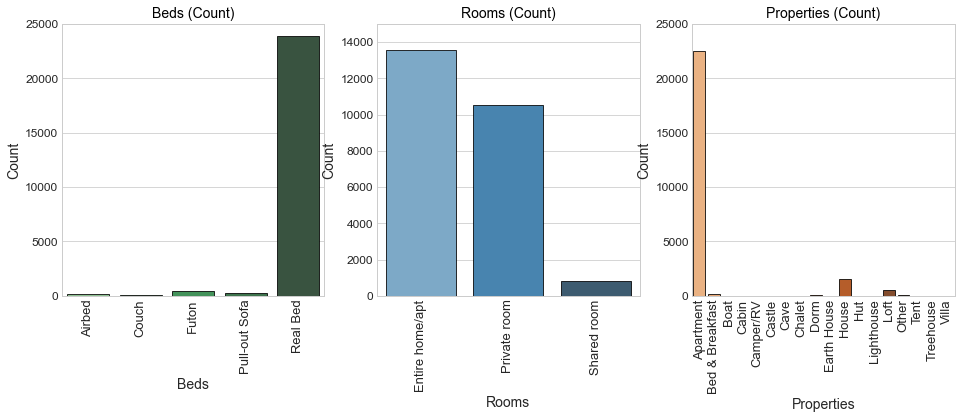

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), sharex=False)
#
_ = sns.barplot(x='index', y='Count', palette="Greens_d", edgecolor='k', data = Beds_Types_Count.reset_index(), ax = ax[0])
_ = ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90, fontsize = 13) 
_ = ax[0].set_title('Beds (Count)')
_ = ax[0].set_ylim([0, 25e3])
_ = ax[0].set_xlabel('Beds')
_ = ax[0].set_ylabel('Count')
#
_ = sns.barplot(x='index', y='Count', palette="Blues_d", edgecolor='k', data = Rooms_Types_Count.reset_index(), ax = ax[1])
_ = ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90, fontsize = 13) 
_ = ax[1].set_title('Rooms (Count)')
_ = ax[1].set_ylim([0, 15e3])
_ = ax[1].set_xlabel('Rooms')
_ = ax[1].set_ylabel('Count')
#
_ = sns.barplot(x='index', y='Count', palette="Oranges_d", edgecolor='k', data = Properties_Types_Count.reset_index(),
                ax = ax[2])
_ = ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=90, fontsize = 13) 
_ = ax[2].set_title('Properties (Count)')
_ = ax[2].set_ylim([0, 2.5e4])
_ = ax[2].set_xlabel('Properties')
_ = ax[2].set_ylabel('Count')

# plt.subplots_adjust(hspace=0.3)

We can see that the majority of beds are real beds and apartments are the most popular ones amount properties. Moreover, most guests prefer to avoid shared rooms.

### Reviews

In [12]:
Columns_list=Data.columns
Review_list=list()
for i in range(len(Columns_list)):
    if Columns_list[i].find('review') != -1:
        Review_list.append(Columns_list[i])
Review=Data[Review_list]
Review.head().style.hide_index()

number_of_reviews,review_scores_rating,review_scores_location,review_scores_checkin,review_scores_communication,review_scores_value,review_scores_cleanliness,review_scores_accuracy
62,86.000000,10.000000,9.000000,9.000000,9.000000,7.000000,9.000000
35,98.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000
26,96.000000,10.000000,10.000000,10.000000,9.000000,9.000000,10.000000
1,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
16,96.000000,10.000000,10.000000,9.000000,9.000000,9.000000,10.000000


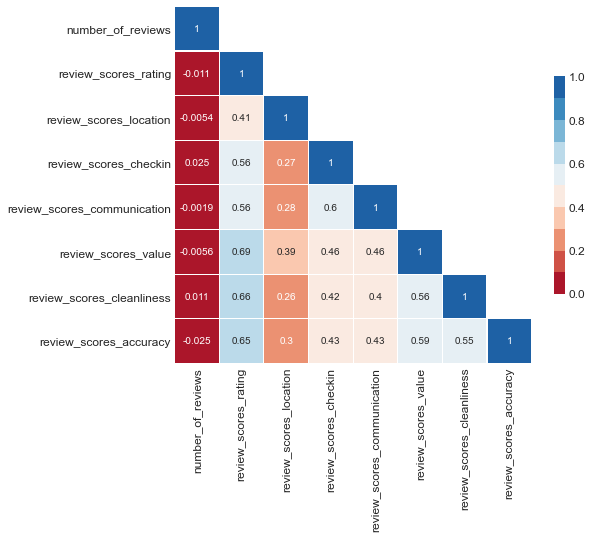

In [13]:
Correlation_Plot (Review, 8)

It seems that **number of reviews** and **review scores location** are insignifiancly correlated with the other rewivew paramters.

In [14]:
Review=Review.drop(columns=['number_of_reviews','review_scores_location'])

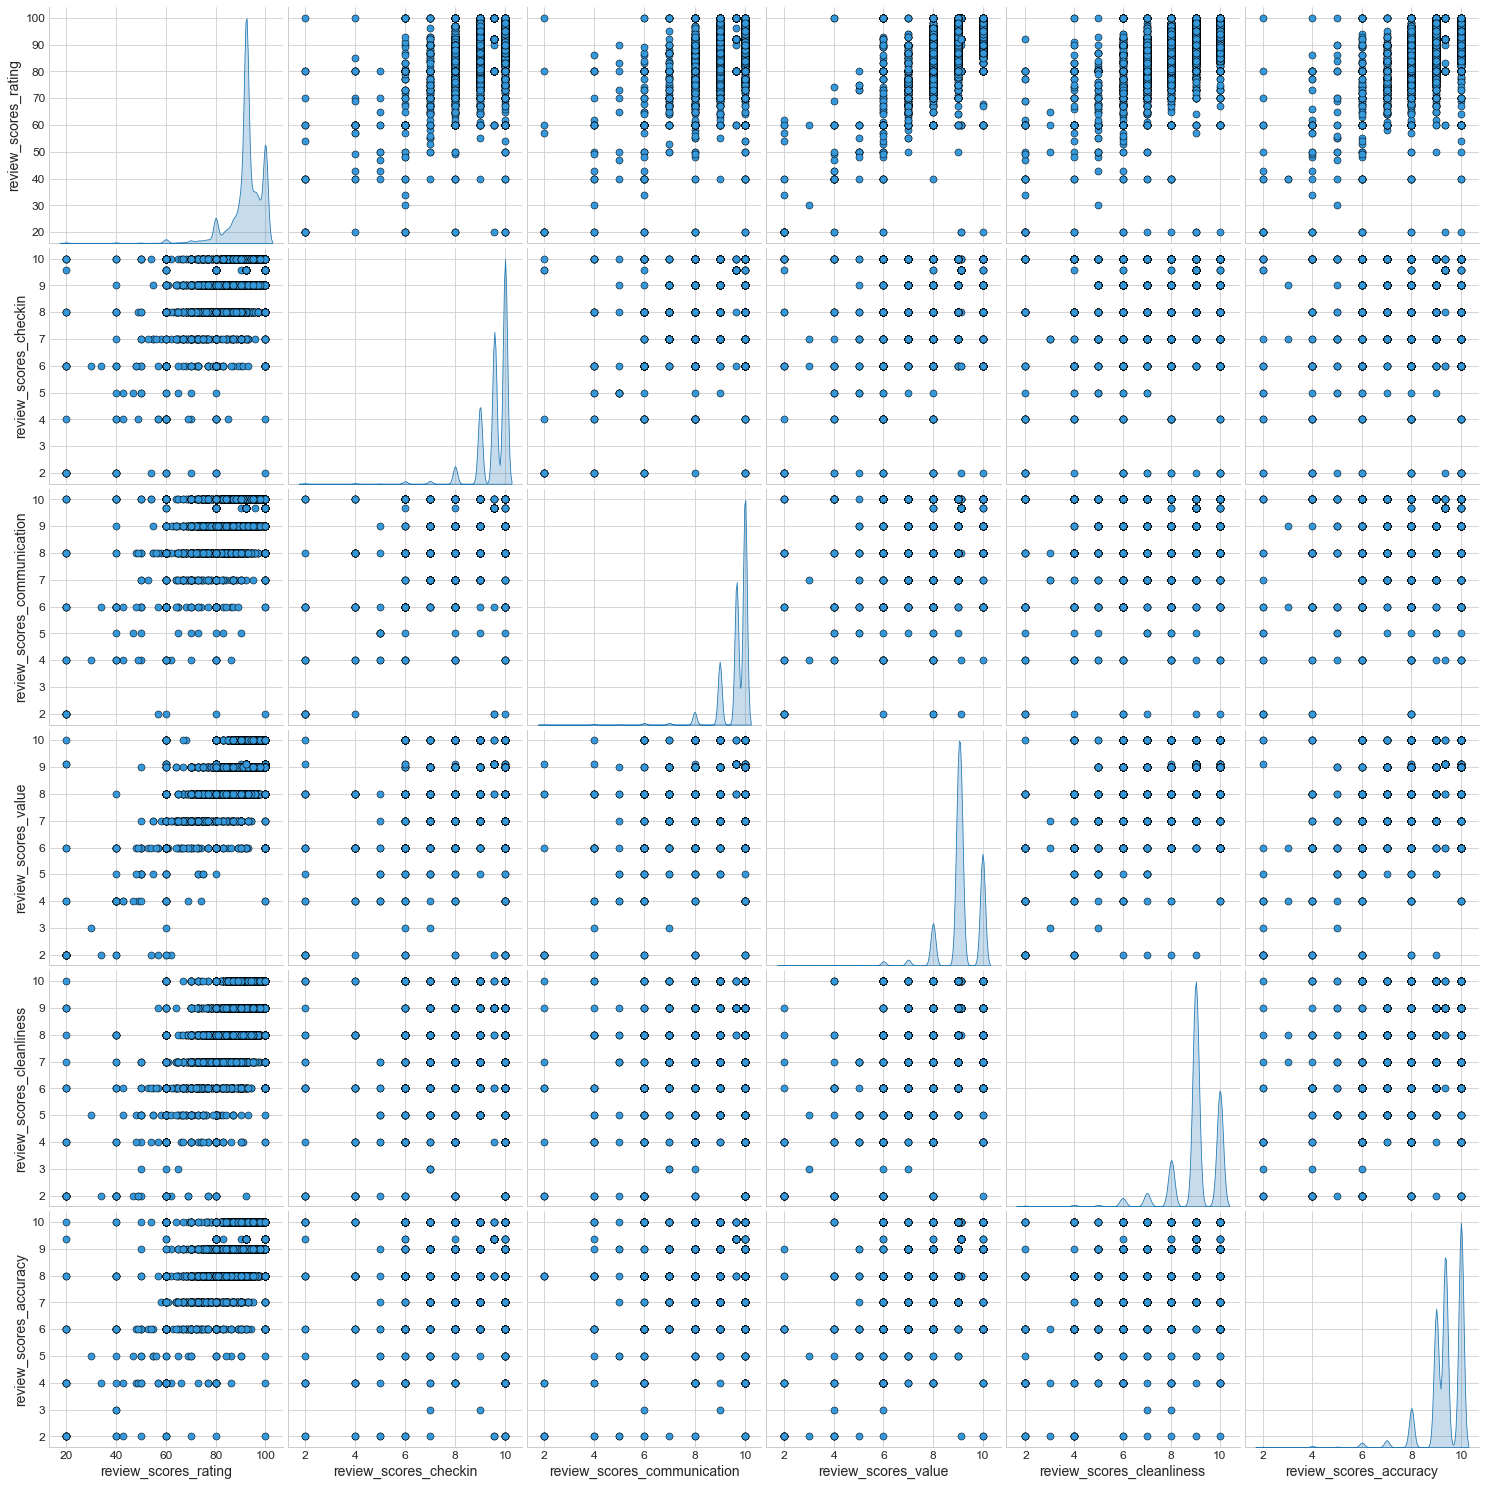

In [15]:
_ = sns.pairplot(Review, height=3.5,diag_kind="kde", plot_kws=dict(s=50, color="#3498db", edgecolor="k", linewidth=0.5),
             diag_kws=dict(shade=True))

### Price and Zipcodes

In [16]:
Columns_list=Data.columns
Price_list=list()
for i in range(len(Columns_list)):
    if Columns_list[i].find('price') != -1:
        Price_list.append(Columns_list[i])
Price=Data[Price_list]
pd.DataFrame(Price.mean(), columns=['mean'])

,mean
price,171.685364
monthly_price,3044.405497
weekly_price,950.968222


Consider the most popular place (using their zip code)

In [17]:
Zip_df = pd.DataFrame(Data.zipcode.value_counts())
Zip_df[Zip_df.zipcode>200].head(18).T

,11211,10002,10009,10003,11238,10011,10014,11216,10019,11206,10012,10025,11221,11222,11237,11215,10016,10036
zipcode,1164,1043,984,824,772,697,674,666,664,631,630,613,610,605,519,493,491,476


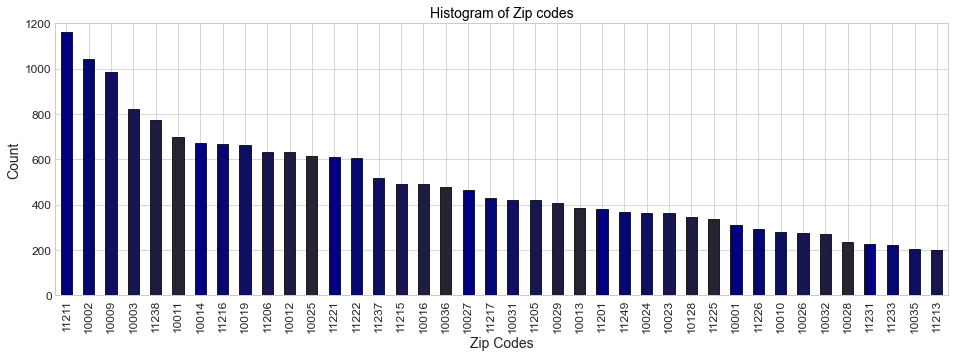

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = Zip_df[Zip_df.zipcode>200].reset_index().plot.bar(x='index', y='zipcode', ax=ax, rot=90, legend=False,
                                                  color=sns.dark_palette("navy", reverse=True), edgecolor="k")
_ = ax.set_title('Histogram of Zip codes')
_ = ax.set_ylim([0, 12e2])
_ = ax.set_xlabel('Zip Codes')
_ = ax.set_ylabel('Count')

In [19]:
Zip_list=Zip_df[Zip_df.zipcode>200].index
Zip_df=Data[['zipcode','price']]
Price_Zipcode = pd.DataFrame(Zip_df.groupby('zipcode')['price'].mean()).round(0)
Price_Zipcode.columns = ['average_price']

In [20]:
Price_Zipcode.head(18).T

zipcode,1001,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,10012,10013,10014,10016,10017,10018,10019
average_price,250.0,301.0,190.0,227.0,187.0,219.0,237.0,457.0,177.0,266.0,254.0,246.0,306.0,281.0,288.0,233.0,201.0,211.0


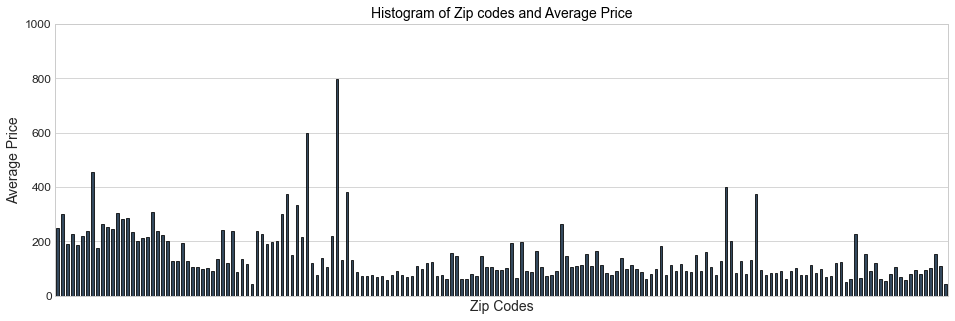

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = Price_Zipcode.plot(kind='bar', ax=ax, legend=False, color='#34495e', edgecolor="k")
_ = ax.set_title('Histogram of Zip codes and Average Price')
_ = ax.set_xticks([])
_ = ax.set_ylim([0, 1e3])
_ = ax.set_xlabel('Zip Codes')
_ = ax.set_ylabel('Average Price')

### Price and Reviews

Creating a new dataframe with price and the average of ratings.

In [22]:
temp=list(Review.columns)
temp.insert(0,'price')
Price=Data[temp]
del temp
Price.review_scores_rating=np.round(Price.review_scores_rating/10)
Price['average_review']=0
Price['average_review']=np.round(Price[Review.columns.tolist()].mean(axis=1))
# Droping unessary columns
Price=Price.drop(columns=Review.columns.tolist()).sort_values('price', ascending=False)
Price.head(10).style.hide_index()

price,average_review
8000.000000,9.000000
6950.000000,9.000000
6500.000000,9.000000
6500.000000,9.000000
6000.000000,9.000000
6000.000000,9.000000
5250.000000,9.000000
5000.000000,9.000000
5000.000000,9.000000
5000.000000,8.000000


In [23]:
Price['average_review']=Price['average_review'].astype('int')
Review_Price=Price.groupby('average_review').mean().round(0)
Review_Price.sort_values('price', ascending=False).head()

,price
average_review,
9,183.0
10,162.0
2,149.0
8,140.0
4,139.0


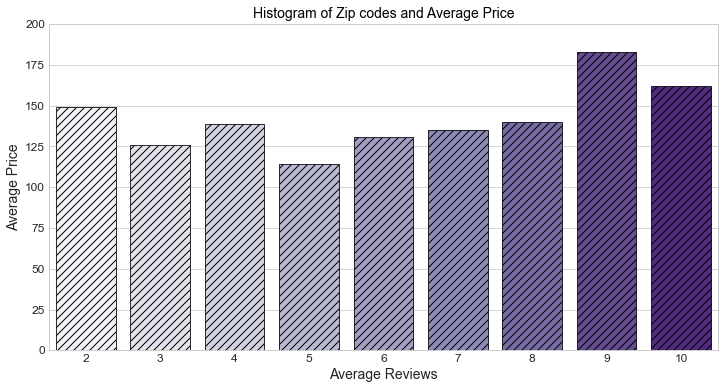

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6), sharex=False)
_ = sns.barplot(ax = ax, x= 'average_review', y= 'price', palette='Purples',
                edgecolor='k',  hatch="///", data= Review_Price.reset_index())
_ = ax.set_title('Histogram of Zip codes and Average Price')
_ = ax.set_ylim([0, 2e2])
_ = ax.set_xlabel('Average Reviews')
_ = ax.set_ylabel('Average Price')

***